In [1]:
#import libraries
import pandas as pd
import numpy as np

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [2]:
day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data understanding and Sanity check

In [3]:
day.shape

(730, 16)

In [4]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
day.drop_duplicates().shape, day.shape

((730, 16), (730, 16))

##### Observations:

    1. Dataset has 730 rows and 16 columns.
    2. One column is date type and one is intex so can drop both the columns.
    3. Also drop the casual and registered, we have 'cnt' which is the count of total rental bikes including both casual and registered.
    3. All the other columns are integer and float.
    
    4. We can also conclude that there were zero duplicate values in the dataset.

In [7]:
# index and date is not necessary in this case  so we drop that columns

day=day.drop(["instant","dteday","casual","registered"], axis=1)

In [8]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### EDA

##### Segregate continuous and categorical variable.

In [9]:
day.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [10]:
day.yr.unique()

array([0, 1], dtype=int64)

In [11]:
cat_var=['season',"yr","mnth","holiday","weekday","workingday","weathersit"]
cont_var=["temp","atemp","hum","windspeed"]
target=['cnt']
len(cont_var)+len(cat_var)+len(target)

12

#### Univarient Analysis

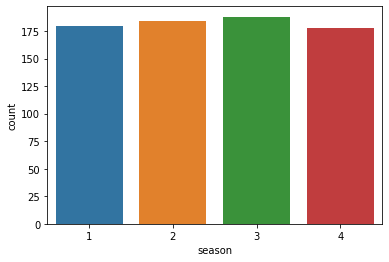

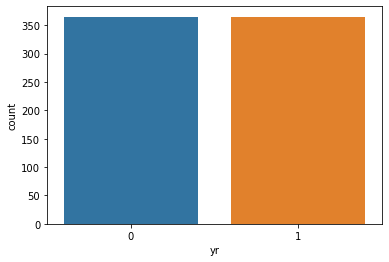

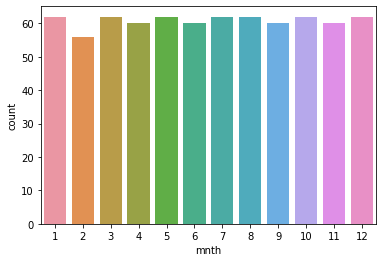

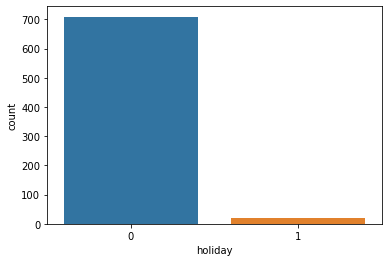

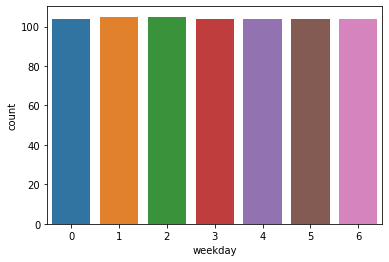

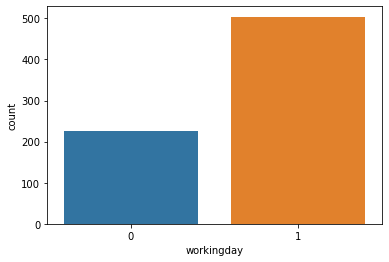

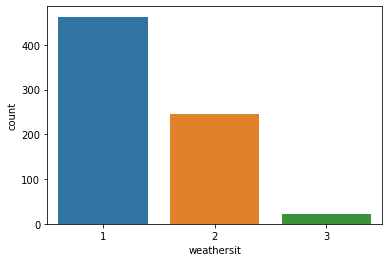

In [12]:
for i in cat_var:
    sns.countplot(day[i])
    plt.show()

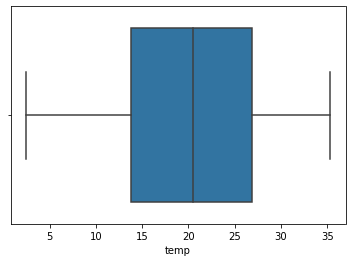

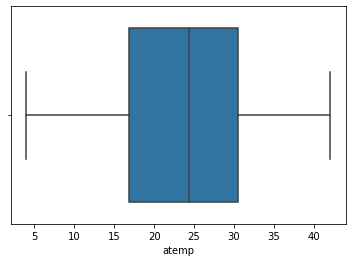

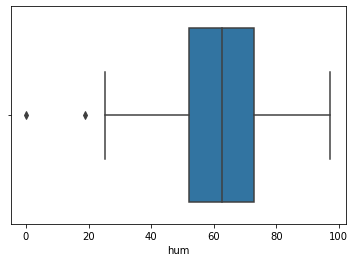

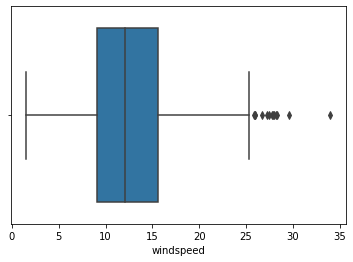

In [13]:
for i in cont_var:
    sns.boxplot(day[i])
    plt.show()

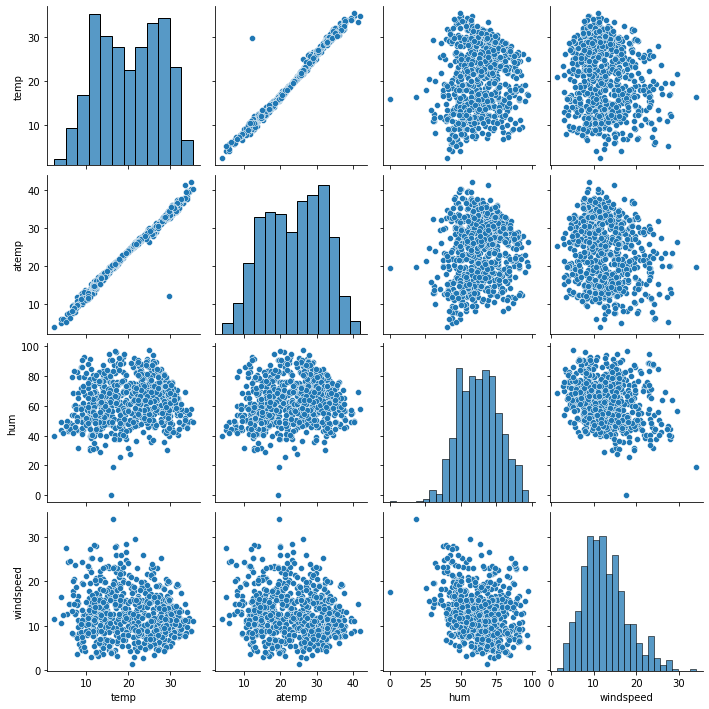

In [14]:
sns.pairplot(day[cont_var])
plt.show()

###### Obervations:
    
The above pairplot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'

#### Bivarient Analysis

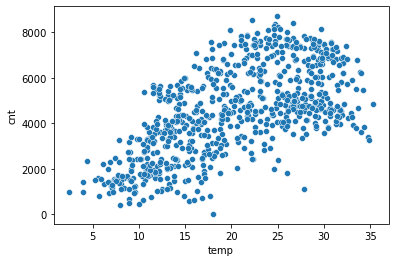

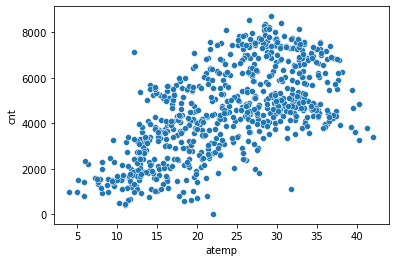

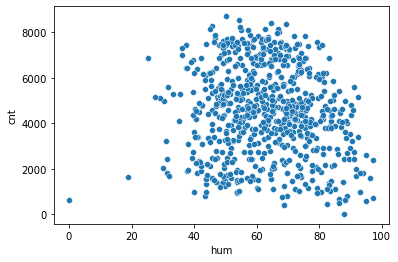

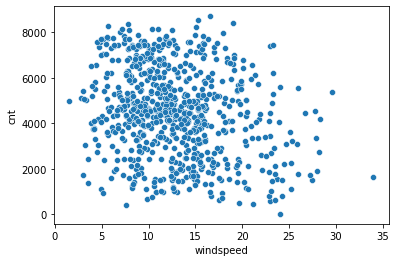

In [15]:
for i in cont_var:
    sns.scatterplot(day[i],day['cnt'])
    plt.show()

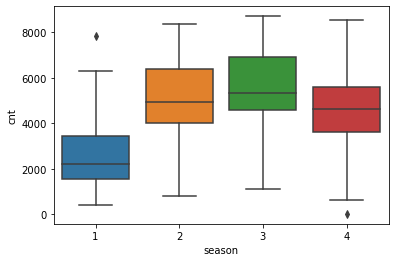

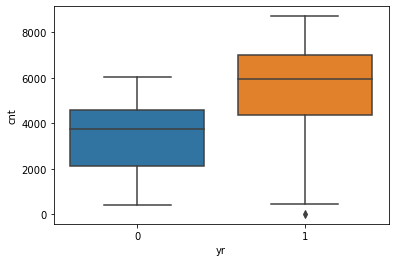

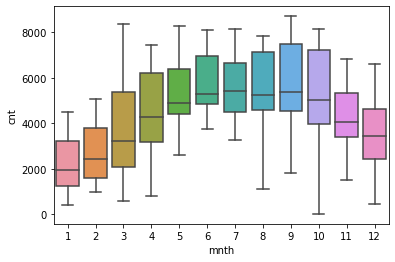

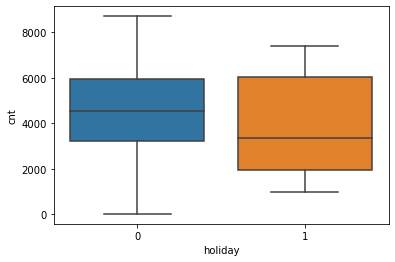

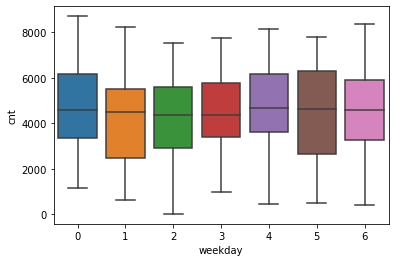

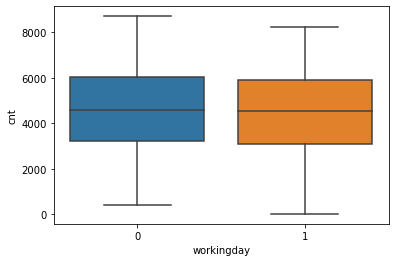

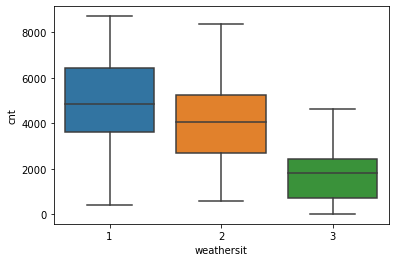

In [16]:
for i in cat_var:
    sns.boxplot(day[i],day['cnt'])
    plt.show()

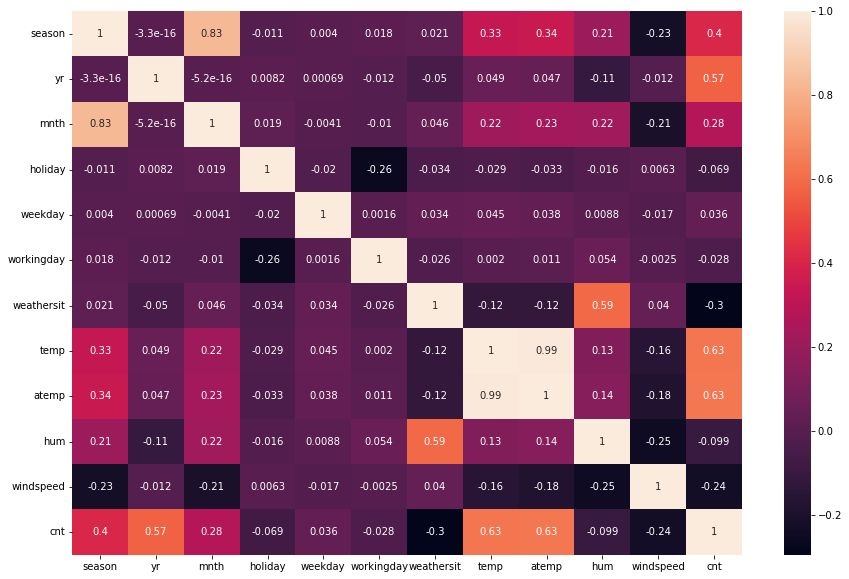

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(day.corr(), annot=True)
plt.show()

<b>There were 7 categorical variables and 4 continuous variable in the dataset:

    1. We use box plot and count plot for categorical variables and scatter plot and pair plot for continuous variable.
    2. Heatmap to understand the correlation between the variables.
    

Observation:

    1. Registered and cnt are highly correlated
    2. The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
    3. year, casual, temp and 'feeling temperature in Celsius'with cnt(count of total rental bikes including both casual and registered) are also have positive correlation

## Pre-Processing Step

### Dummy Variable Creation

In [18]:
# Create dummy variable
# Drop the original variable
# Drop first dummy variable for each set of dummies created.

day[cat_var].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [19]:
# create dummy variable for all have more that 2 unique variable

season_dum=pd.get_dummies(day.season,drop_first=True)
season_dum.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [20]:
season_dum.rename(columns={2:"summer",3:"fall",4:"winter"},inplace=True)
season_dum.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [21]:
mnth_dum=pd.get_dummies(day['mnth'],drop_first=True)
mnth_dum.head()

,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [22]:
mnth_dum.rename(columns = {2:'feb', 3:'march',
                              4:'april',5:"may",6:"june",7:"july",8:"aug",9:"sep",10:"oct",11: "nov",12:"dec"}, inplace = True)
mnth_dum.head()

,feb,march,april,may,june,july,aug,sep,oct,nov,dec
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [23]:
weekday_dum=pd.get_dummies(day['weekday'],drop_first=True)
weekday_dum.head()

,1,2,3,4,5,6
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0


In [24]:
weekday_dum.rename(columns = {1: 'mon' ,2:'tue', 3:'wed',
                              4:'thu',5:"fri",6:"sat"}, inplace = True)
weekday_dum.head()

,mon,tue,wed,thu,fri,sat
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0


In [25]:
weathersit_dum=pd.get_dummies(day['weathersit'],drop_first=True)
weathersit_dum.head()

,2,3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [26]:
weathersit_dum.rename(columns={2: 'mist',3:"snow"},inplace=True)
weathersit_dum.head()

,mist,snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


###### 'yr' , 'holiday' and "weathersit" has only two unique values so no need to take dummy variable

In [27]:
df=pd.concat([day,season_dum,mnth_dum, weekday_dum, weathersit_dum], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,nov,dec,mon,tue,wed,thu,fri,sat,mist,snow
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,1,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,0,0,1,0
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,1,0,0,0


In [28]:
df=df.drop(["season",'mnth','weekday','weathersit'], axis=1)

In [29]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,nov,dec,mon,tue,wed,thu,fri,sat,mist,snow
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   summer      730 non-null    uint8  
 9   fall        730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  feb         730 non-null    uint8  
 12  march       730 non-null    uint8  
 13  april       730 non-null    uint8  
 14  may         730 non-null    uint8  
 15  june        730 non-null    uint8  
 16  july        730 non-null    uint8  
 17  aug         730 non-null    uint8  
 18  sep         730 non-null    uint8  
 19  oct         730 non-null    u

## Data Preperation

### Split the train and test data

In [31]:
# we use sklearn package to split the dataset

from sklearn.model_selection import train_test_split

np.random.seed(0)

df_train, df_test = train_test_split(df, train_size = 0.70, test_size = 0.30, random_state = 333)

In [32]:
df_train.shape,df_test.shape

((510, 30), (219, 30))

### Scaling and Feature selection:

In [33]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'summer', 'fall', 'winter', 'feb', 'march', 'april', 'may',
       'june', 'july', 'aug', 'sep', 'oct', 'nov', 'dec', 'mon', 'tue', 'wed',
       'thu', 'fri', 'sat', 'mist', 'snow'],
      dtype='object')

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [35]:
# Scaling Train data
num_var=["temp","atemp","hum","windspeed","cnt"]

df_train[num_var] = scaler.fit_transform(df_train[num_var])

#Scaling Test data
df_test[num_var] = scaler.transform(df_test[num_var])

In [36]:
# Checking values after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,nov,dec,mon,tue,wed,thu,fri,sat,mist,snow
483,1,0,1,0.497426,0.487055,0.609956,0.194850,0.722734,1,0,...,0,0,1,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,0,0,1,0,0,0,0,0
714,1,0,1,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,1,0,0,0,0,0,1,0
8,0,0,1,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,1,0,0,0,0,0,0


In [37]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,nov,dec,mon,tue,wed,thu,fri,sat,mist,snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.692157,0.540901,0.515631,0.647390,0.346318,0.515144,0.247059,0.262745,...,0.086275,0.076471,0.143137,0.152941,0.131373,0.139216,0.147059,0.143137,0.341176,0.025490
std,0.500487,0.151726,0.462054,0.227898,0.213626,0.149722,0.160266,0.224281,0.431725,0.440557,...,0.281045,0.266010,0.350557,0.360284,0.338139,0.346511,0.354512,0.350557,0.474570,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Building


### Dividing into X and Y sets for the model building

In [38]:
# Divide train data

y_train = df_train.pop("cnt")
X_train = df_train

In [39]:
# Divide the test data

y_test = df_test.pop("cnt")
X_test = df_test

In [40]:
X_train.shape,y_train.shape

((510, 29), (510,))

In [41]:
X_test.shape,y_test.shape

((219, 29), (219,))

#### RFE

In [42]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [43]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [44]:
rfe = RFE(lr, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [45]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 11),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('feb', False, 10),
 ('march', True, 1),
 ('april', False, 8),
 ('may', False, 6),
 ('june', False, 7),
 ('july', False, 15),
 ('aug', False, 9),
 ('sep', True, 1),
 ('oct', True, 1),
 ('nov', False, 12),
 ('dec', False, 13),
 ('mon', True, 1),
 ('tue', True, 1),
 ('wed', False, 2),
 ('thu', False, 4),
 ('fri', False, 3),
 ('sat', False, 14),
 ('mist', True, 1),
 ('snow', True, 1)]

In [46]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'summer', 'fall', 'winter',
       'march', 'sep', 'oct', 'mon', 'tue', 'mist', 'snow'],
      dtype='object')

In [47]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'feb', 'april', 'may', 'june', 'july', 'aug',
       'nov', 'dec', 'wed', 'thu', 'fri', 'sat'],
      dtype='object')

In [48]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Model 1

###### Achive: p-value should be < 0.05 and VIF should be < 5 

In [49]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [50]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.1
Date:                Sat, 06 Aug 2022   Prob (F-statistic):          1.36e-185
Time:                        11:18:34   Log-Likelihood:                 506.80
No. Observations:                 510   AIC:                            -981.6
Df Residuals:                     494   BIC:                            -913.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2380      0.028      8.437      0.000       0.183       0.293
yr             0.2288      0.008     27.884      0.000       0.213       0.245
temp           0.3943      0.135      2.921      0.004       0.129       0.659
atemp          0.0887      0.138      0.642      0.521      -0.183       0.360
hum           -0.1710      0.038     -4.541      0.000      -0.245      -0.097
windspeed     -0.1799      0.028     -6.400      0.000      -0.235      -0.125
summer         0.1324      0.015      8.669      0.000       0.102       0.162
fall           0.0853      0.021      4.063      0.000       0.044       0.127
winter         0.1525      0.014     10.648      0.000       0.124       0.181
march          0.0471      0.016      2.940      0.003       0.016       0.079
sep            0.1005      0.016      6.302      0.000       0.069       0.132
oct            0.0557      0.018      3.101      0.002       0.020       0.091
mon           -0.0243      0.012     -2.055      0.040      -0.047      -0.001
tue           -0.0368      0.011     -3.218      0.001      -0.059      -0.014
mist          -0.0477      0.011     -4.450      0.000      -0.069      -0.027
snow          -0.2723      0.029     -9.533      0.000      -0.328      -0.216
==============================================================================
Omnibus:                       93.066   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.298
Skew:                          -0.933   Prob(JB):                     1.19e-49
Kurtosis:                       5.668   Cond. No.                         79.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,386.08
2,atemp,364.04
3,hum,16.13
6,fall,7.11
4,windspeed,4.51
5,summer,3.54
7,winter,3.02
13,mist,2.15
0,yr,2.02
10,oct,1.66


### Model 2

<b> Removing the variable 'atemp' based on its High P value and VIF

In [52]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [53]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)
# Create a 2nd fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [54]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     185.7
Date:                Sat, 06 Aug 2022   Prob (F-statistic):          1.20e-186
Time:                        11:18:34   Log-Likelihood:                 506.59
No. Observations:                 510   AIC:                            -983.2
Df Residuals:                     495   BIC:                            -919.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2393      0.028      8.509      0.000       0.184       0.295
yr             0.2288      0.008     27.898      0.000       0.213       0.245
temp           0.4782      0.034     14.154      0.000       0.412       0.545
hum           -0.1702      0.038     -4.525      0.000      -0.244      -0.096
windspeed     -0.1834      0.028     -6.652      0.000      -0.238      -0.129
summer         0.1326      0.015      8.686      0.000       0.103       0.163
fall           0.0838      0.021      4.019      0.000       0.043       0.125
winter         0.1528      0.014     10.689      0.000       0.125       0.181
march          0.0473      0.016      2.956      0.003       0.016       0.079
sep            0.1005      0.016      6.308      0.000       0.069       0.132
oct            0.0558      0.018      3.109      0.002       0.021       0.091
mon           -0.0239      0.012     -2.028      0.043      -0.047      -0.001
tue           -0.0365      0.011     -3.196      0.001      -0.059      -0.014
mist          -0.0479      0.011     -4.474      0.000      -0.069      -0.027
snow          -0.2728      0.029     -9.559      0.000      -0.329      -0.217
==============================================================================
Omnibus:                       92.167   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.631
Skew:                          -0.925   Prob(JB):                     4.53e-49
Kurtosis:                       5.655   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,23.19
2,hum,15.85
5,fall,7.03
3,windspeed,4.35
4,summer,3.54
6,winter,3.01
12,mist,2.14
0,yr,2.02
9,oct,1.66
8,sep,1.28


### Model 3:

<b> Removing the variable 'hum' based on its High p-value

<b> Even though the VIF of hum is second highest, we decided to drop 'hum' and not 'temp' based on general knowledge that temperature (because of high coefficient value) can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [56]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [57]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)
# Create a 3rd fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [58]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.9
Date:                Sat, 06 Aug 2022   Prob (F-statistic):          1.86e-183
Time:                        11:18:35   Log-Likelihood:                 496.25
No. Observations:                 510   AIC:                            -964.5
Df Residuals:                     496   BIC:                            -905.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1417      0.018      7.702      0.000       0.106       0.178
yr             0.2330      0.008     28.043      0.000       0.217       0.249
temp           0.4461      0.034     13.248      0.000       0.380       0.512
windspeed     -0.1466      0.027     -5.458      0.000      -0.199      -0.094
summer         0.1343      0.016      8.634      0.000       0.104       0.165
fall           0.0932      0.021      4.402      0.000       0.052       0.135
winter         0.1496      0.015     10.277      0.000       0.121       0.178
march          0.0549      0.016      3.382      0.001       0.023       0.087
sep            0.0922      0.016      5.713      0.000       0.060       0.124
oct            0.0546      0.018      2.989      0.003       0.019       0.091
mon           -0.0279      0.012     -2.330      0.020      -0.051      -0.004
tue           -0.0397      0.012     -3.421      0.001      -0.063      -0.017
mist          -0.0761      0.009     -8.596      0.000      -0.094      -0.059
snow          -0.3234      0.027    -12.076      0.000      -0.376      -0.271
==============================================================================
Omnibus:                       86.928   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.931
Skew:                          -0.888   Prob(JB):                     8.59e-45
Kurtosis:                       5.529   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,15.20
4,fall,6.69
2,windspeed,3.89
3,summer,3.51
5,winter,2.89
0,yr,2.01
8,oct,1.66
11,mist,1.51
7,sep,1.27
10,tue,1.21


### Model 4:

<b> Removing the variable 'fall' based on its High VIF value

<b> Even though the VIF of fall is second highest, we decided to drop 'fall' and not 'temp' based on general knowledge that temperature (because of high coefficient value) can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [60]:
X_train_new = X_train_new.drop(["fall"], axis = 1)

In [61]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)
# Create a 3rd fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [62]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     197.9
Date:                Sat, 06 Aug 2022   Prob (F-statistic):          1.66e-180
Time:                        11:18:36   Log-Likelihood:                 486.48
No. Observations:                 510   AIC:                            -947.0
Df Residuals:                     497   BIC:                            -891.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1252      0.018      6.828      0.000       0.089       0.161
yr             0.2311      0.008     27.354      0.000       0.215       0.248
temp           0.5645      0.021     27.333      0.000       0.524       0.605
windspeed     -0.1513      0.027     -5.535      0.000      -0.205      -0.098
summer         0.0832      0.011      7.891      0.000       0.062       0.104
winter         0.1172      0.013      9.163      0.000       0.092       0.142
march          0.0431      0.016      2.646      0.008       0.011       0.075
sep            0.1044      0.016      6.449      0.000       0.073       0.136
oct            0.0427      0.018      2.320      0.021       0.007       0.079
mon           -0.0250      0.012     -2.049      0.041      -0.049      -0.001
tue           -0.0381      0.012     -3.224      0.001      -0.061      -0.015
mist          -0.0763      0.009     -8.462      0.000      -0.094      -0.059
snow          -0.3153      0.027    -11.589      0.000      -0.369      -0.262
==============================================================================
Omnibus:                       67.388   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.494
Skew:                          -0.768   Prob(JB):                     7.60e-29
Kurtosis:                       4.933   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.05
2,windspeed,3.72
0,yr,2.00
4,winter,1.94
7,oct,1.63
3,summer,1.56
10,mist,1.50
6,sep,1.23
9,tue,1.21
8,mon,1.18


### Model 5:

<b> Removing the variable 'mon' based on its High p-value

In [64]:
X_train_new = X_train_new.drop(["mon"], axis = 1)

In [65]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)
# Create a 3rd fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [66]:
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     214.1
Date:                Sat, 06 Aug 2022   Prob (F-statistic):          8.89e-181
Time:                        11:18:36   Log-Likelihood:                 484.34
No. Observations:                 510   AIC:                            -944.7
Df Residuals:                     498   BIC:                            -893.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1189      0.018      6.556      0.000       0.083       0.155
yr             0.2316      0.008     27.328      0.000       0.215       0.248
temp           0.5673      0.021     27.443      0.000       0.527       0.608
windspeed     -0.1515      0.027     -5.527      0.000      -0.205      -0.098
summer         0.0834      0.011      7.880      0.000       0.063       0.104
winter         0.1174      0.013      9.149      0.000       0.092       0.143
march          0.0449      0.016      2.748      0.006       0.013       0.077
sep            0.1042      0.016      6.418      0.000       0.072       0.136
oct            0.0440      0.018      2.382      0.018       0.008       0.080
tue           -0.0339      0.012     -2.906      0.004      -0.057      -0.011
mist          -0.0759      0.009     -8.391      0.000      -0.094      -0.058
snow          -0.3152      0.027    -11.548      0.000      -0.369      -0.262
==============================================================================
Omnibus:                       68.096   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.281
Skew:                          -0.785   Prob(JB):                     2.30e-28
Kurtosis:                       4.877   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.03
2,windspeed,3.64
0,yr,2.00
4,winter,1.93
7,oct,1.63
3,summer,1.56
9,mist,1.50
6,sep,1.23
8,tue,1.18
5,march,1.14


<b> This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

In [80]:
lr5.params

const        0.118911
yr           0.231565
temp         0.567307
windspeed   -0.151516
summer       0.083354
winter       0.117428
march        0.044866
sep          0.104210
oct          0.043966
tue         -0.033924
mist        -0.075881
snow        -0.315152
dtype: float64

## Final Model Interpretation


#### F-Statistics: 
F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

F-statistic: 214.1<br>
Prob (F-statistic): 8.89e-181<br>
The F-Statistics value of 214.1 (which is greater than 1) and the p-value is "8.89e-181" which is ~0 states that the overall model is significant

###### The equation of best fitted surface based on model lr8:

cnt = 0.1189 + (yr × 0.2316) + (temp × 0.5673) − (windspeed × 0.1515) + (summer × 0.0834) + (winter × 0.1174) + (winter × 0.0449)+ (sep × 0.1042) + (sep × 0.0440)- (tue × 0.0339) − (mist × 0.0759) - (snow × 0.3152)

#### Residual Analysis Of Training Data

In [68]:
y_train_pred = lr5.predict(X_train_lm5)

Text(0.5, 0, 'Errors')

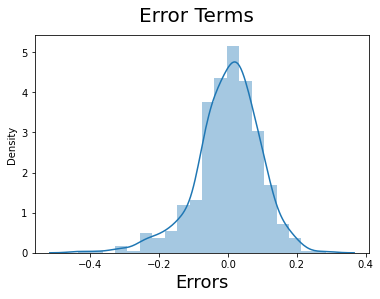

In [69]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

<b>Observation: 
    
From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

In [70]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.03
2,windspeed,3.64
0,yr,2.00
4,winter,1.93
7,oct,1.63
3,summer,1.56
9,mist,1.50
6,sep,1.23
8,tue,1.18
5,march,1.14


From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

### Applying Scaling on test dataset

Test data split and scaling has already been done at the begining of model building

In [71]:
X_test.shape,y_test.shape

((219, 29), (219,))

In [72]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm5 = sm.add_constant(X_test)
X_test_lm5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   const      219 non-null    float64
 1   yr         219 non-null    int64  
 2   temp       219 non-null    float64
 3   windspeed  219 non-null    float64
 4   summer     219 non-null    uint8  
 5   winter     219 non-null    uint8  
 6   march      219 non-null    uint8  
 7   sep        219 non-null    uint8  
 8   oct        219 non-null    uint8  
 9   tue        219 non-null    uint8  
 10  mist       219 non-null    uint8  
 11  snow       219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(8)
memory usage: 10.3 KB


In [73]:
X_test_lm5

,const,yr,temp,windspeed,summer,winter,march,sep,oct,tue,mist,snow
22,1.0,0,0.046591,0.462217,0,0,0,0,0,1,0,0
468,1.0,1,0.543115,0.347424,1,0,0,0,0,0,0,0
553,1.0,1,0.951196,0.212829,0,0,0,0,0,0,0,0
504,1.0,1,0.699909,0.478229,1,0,0,0,0,0,0,0
353,1.0,0,0.407087,0.080770,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
237,1.0,0,0.798555,0.126931,0,0,0,0,0,0,0,0
611,1.0,1,0.830744,0.441027,0,0,0,1,0,0,0,0
258,1.0,0,0.510926,0.292310,0,0,0,1,0,0,1,0
518,1.0,1,0.677065,0.333343,1,0,0,0,0,0,0,0


In [74]:
# Making predictions using the final model (lr6)

y_pred = lr5.predict(X_test_lm5)

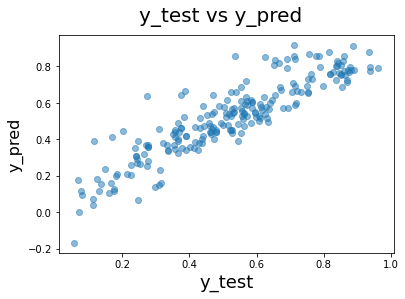

In [75]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

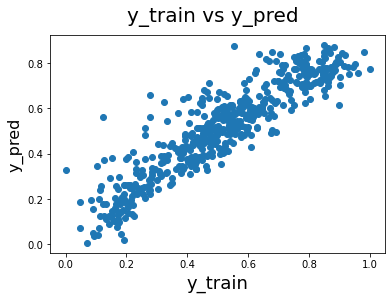

In [87]:
#Visualizing the fit train dataset
fig = plt.figure()
plt.scatter(y_train,y_train_pred)
fig.suptitle('y_train vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

### R^2 Value for Test

In [76]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8058093101140822

### Adjusted R^2 for Test

In [77]:
# n is number of rows in X
r2=0.805
n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7946376811594204

### Result Comparison

Train:

    R^2           : 0.825
    Adjusted R^2  : 0.822
    
Test :

    R^2           : 0.805
    Adjusted R^2  : 0.794
    
#### Really very good data model by generalising various data set

<b>As per our final Model, the top 3 predictor variables that influences the bike booking are:
    
    1. Year (yr): The coefficient value of 0.2316 indicated that a unit increase in yr variable increases the bike hire numbers by 0.2308 units.
    
    2 Temperature (temp) : The coefficient of 0.5673 indicates that a unit increased in temp variable increases the bike hire number by 0.5673 units.
    
    3. windspeed : The coefficient of -0.1515 that a unit increase in windspeed variable decreases the bike hire numbers by 0.1515 units.

-end-